In [ ]:
%pip install pandas
%pip install seaborn

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
import warnings
warnings.filterwarnings('ignore')

### Часть I

[Titanic dataset](https://www.kaggle.com/competitions/titanic/overview) — данные о пассажирах титаника

Загрузим данные

In [3]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задание 1
Постройте графики распределения возраста в зависимости от совокупности факторов:
- пол
- выжил или нет

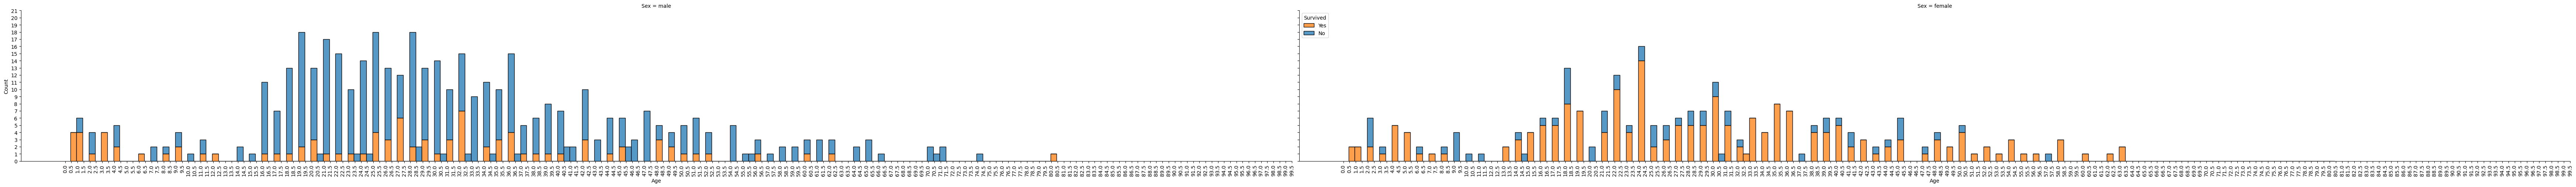

In [180]:
# titanic.head()

g = sns.displot(data=titanic, x='Age', col='Sex',       # при row='Sex' почему-то не отображаются деления
                hue='Survived', multiple="stack",       # в числах у верхнего графика
                legend=False, binwidth=0.5, aspect=7)
g.set(xticks=np.arange(0, 100, 0.5), yticks=np.arange(0, 22))
g.set_xticklabels(np.arange(0, 100, 0.5), rotation=90)

plt.legend(title='Survived', loc='upper left', labels=['Yes', 'No'])
plt.show(g)

#### Задание 2
Найдидте самое популярное женское имя

In [194]:
def parse_first_name_female(name):
    # Заполняем таблицу именами, где присутствуют скобки, иначе NaN
    first = name.str.extract(r"Mrs\.\s+[^(]*\((\w+)", expand=False)
    # Те строки, которые NaN, парсим заново, но с другим регулярным выражением
    first.loc[first.isna()] = name.str.extract(r"\.\s+(\w+)", expand=False)
    return first

names = parse_first_name_female(titanic.loc[titanic['Sex'] == 'female', 'Name'])

names.value_counts().index[0]



'Anna'

#### Задание 3
Сколько на Титанике было детей?

In [195]:
res = titanic[titanic['Age'] <= 18].shape[0]

print(res)

139


#### Задание 4
Найдите и подкрепите агрументами такое правило, что
1) все удовлетворяющие ему пассаижры выжили;
2) все уодвлетворяющие ему пассажиры погибли.

Постарайтесь найти такие правила, чтобы под них попало как можно большее число пассажиров

In [196]:
# Неточная оценка

# Все женщины с возрастом более 60 лет выжили
survived_1 = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 60) & (titanic['Survived'] == 1)].shape[0]
dead_1 = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 60) & (titanic['Survived'] == 0)].shape[0]
print("Выжило: ", survived_1, "Погибло: ", dead_1)

# Все мужчины с возрастом от 63 до 79 погибли
survived_2 = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] >= 63) & (titanic['Age'] <= 79) & (titanic['Survived'] == 1)].shape[0]
dead_2 = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] >= 63) & (titanic['Age'] <= 79) & (titanic['Survived'] == 0)].shape[0]
print("Выжило: ", survived_2, "Погибло: ", dead_2)

# Точный список возростов для выживших женщин и погибших мужчин

# Выжившие женщины
survived_3 = titanic.loc[(titanic['Sex'] == 'female'), ['Age', 'Survived']]
survived_women = survived_3.groupby(['Age']).filter(lambda group: (group['Survived'] == 1).all()).drop_duplicates().sort_values('Age')['Age'].array
print("Список возрастов выживших женщин:\n", survived_women)

# Погмбшие мужчины
dead_3 = titanic.loc[(titanic['Sex'] == 'male'), ['Age', 'Survived']]
dead_men = dead_3.groupby(['Age']).filter(lambda group: (group['Survived'] == 0).all()).drop_duplicates().sort_values('Age')['Age'].array
print("Список возрастов погибших мужчин:\n", dead_men)




Выжило:  4 Погибло:  0
Выжило:  0 Погибло:  12
Список возрастов выживших женщин:
 <NumpyExtensionArray>
[0.75,  1.0,  4.0,  5.0,  7.0, 13.0, 15.0, 19.0, 32.5, 33.0, 34.0, 35.0, 36.0,
 42.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 58.0, 60.0, 62.0, 63.0]
Length: 25, dtype: float64
Список возрастов погибших мужчин:
 <NumpyExtensionArray>
[ 7.0, 10.0, 14.0, 15.0, 20.5, 23.5, 24.5, 28.5, 30.5, 32.5, 33.0, 34.5, 36.5,
 40.5, 41.0, 43.0, 45.5, 46.0, 47.0, 54.0, 55.0, 55.5, 57.0, 58.0, 59.0, 61.0,
 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0]
Length: 33, dtype: float64


### Часть II

In [198]:
data = pd.read_csv('../data/hw2.csv')

data.head(555555)

,x,y,label
0,-10.000000,2.810336,1
1,-9.797980,4.372333,1
2,-9.595960,1.576963,1
3,-9.393939,5.312654,1
4,-9.191919,0.742314,1
...,...,...,...
95,9.191919,-3.088064,0
96,9.393939,4.278246,1
97,9.595960,0.604211,1
98,9.797980,-9.317877,0


#### Задание 5
Вам необхоидмо составить и обосновать правило, которое идеально классифицирует объекты из таблицы `data`.
Класс примера находится в колонке `label`, а признаки — в колонках `x` и `y`

Text(0.5, 1.0, 'My plot')

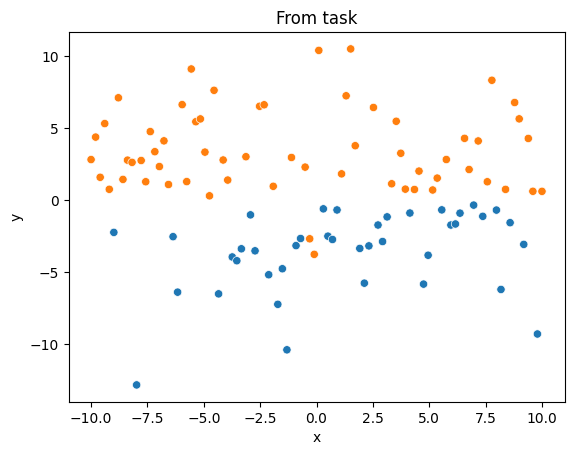

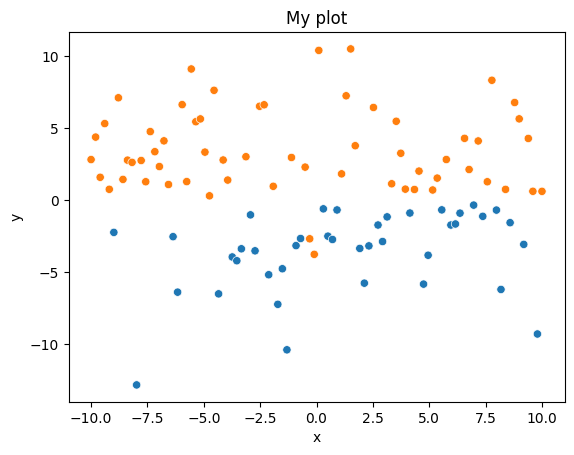

In [199]:
a = sns.scatterplot(data=data, x='x', y='y', hue='label', legend=False)
a.set_title('From task')

plt.figure()

def classification(row):
    if row['y'] >= 0 or (row['x'] >= -0.304 and row['x'] <= 0):
        return 1
    return 0

copy = data
copy['label'] = copy.apply(classification, axis=1)

b = sns.scatterplot(data=copy, x='x', y='y', hue='label', legend=False)
b.set_title('My plot')